# Reinforcement Learning

Referensi: https://www.kaggle.com/code/basu369victor/my-first-attempt-with-reinforcement-learning

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import inspect
import random
import gym
import tensorflow as tf
import tensorflow.keras.layers as kl
import tensorflow.keras.losses as kls
import tensorflow.keras.optimizers as ko
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from collections import deque
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
!pip install 'kaggle-environments>=0.1.6'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 6.3 MB/s 
     |████████████████████████████████| 62 kB 616 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [5]:
!pip install 'vec_noise'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 7.9 MB/s 
  Created wheel for vec-noise: filename=vec_noise-1.1.4-cp38-cp38-linux_x86_64.whl size=80016 sha256=07e08874cf9b9d9bd272174cc61b020a0f810cb8e498327e5bda22ffd57115dd
  Stored in directory: /root/.cache/pip/wheels/4e/4f/15/c20d693101f193f8cbf7919d43f8fe0bf0db2066474c8a94c4
Successfully built vec-noise


In [6]:
from kaggle_environments import evaluate, make, utils
env = make("connectx", debug=True)
env.render()

In [7]:
env.agents

{'random': <function kaggle_environments.envs.connectx.connectx.random_agent(obs, config)>,
 'negamax': <function kaggle_environments.envs.connectx.connectx.negamax_agent(obs, config)>}

In [8]:
env.configuration

{'episodeSteps': 1000,
 'actTimeout': 2,
 'runTimeout': 1200,
 'columns': 7,
 'rows': 6,
 'inarow': 4,
 'agentTimeout': 60,
 'timeout': 2}

In [9]:
env.specification

{'name': 'connectx',
 'title': 'ConnectX',
 'description': 'Classic Connect in a row but configurable.',
 'version': '1.0.1',
 'agents': [2],
 'configuration': {'episodeSteps': {'description': 'Maximum number of steps in the episode.',
   'type': 'integer',
   'minimum': 1,
   'default': 1000},
  'actTimeout': {'description': 'Maximum runtime (seconds) to obtain an action from an agent.',
   'type': 'number',
   'minimum': 0,
   'default': 2},
  'runTimeout': {'description': 'Maximum runtime (seconds) of an episode (not necessarily DONE).',
   'type': 'number',
   'minimum': 0,
   'default': 1200},
  'columns': {'description': 'The number of columns on the board',
   'type': 'integer',
   'default': 7,
   'minimum': 1},
  'rows': {'description': 'The number of rows on the board',
   'type': 'integer',
   'default': 6,
   'minimum': 1},
  'inarow': {'description': 'The number of checkers in a row required to win.',
   'type': 'integer',
   'default': 4,
   'minimum': 1},
  'agentTimeout

In [10]:
def my_agent(observation, configuration):
    from random import choice
    return choice([c for c in range(configuration.columns) if observation.board[c] == 0])

In [11]:
# Play as first position against random agent.
trainer = env.train([None, "random"])
observation = trainer.reset()

print("Observation contains:\t", observation)
print("Configuration contains:\t", env.configuration)

Observation contains:	 {'remainingOverageTime': 60, 'step': 0, 'board': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'mark': 1}
Configuration contains:	 {'episodeSteps': 1000, 'actTimeout': 2, 'runTimeout': 1200, 'columns': 7, 'rows': 6, 'inarow': 4, 'agentTimeout': 60, 'timeout': 2}


In [12]:
my_action = my_agent(observation, env.configuration)
print("My Action", my_action)
observation, reward, done, info = trainer.step(my_action)
env.render(mode="ipython", width=100, height=90, header=False, controls=False)
print("Observation after:\t", observation)

My Action 1


Observation after:	 {'remainingOverageTime': 60, 'step': 2, 'board': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0], 'mark': 1}


In [13]:
trainer = env.train([None, "random"])
observation = trainer.reset()
while not env.done:
    my_action = my_agent(observation, env.configuration)
    print("My Action", my_action)
    observation, reward, done, info = trainer.step(my_action)
    print(reward)
env.render(mode="ipython", width=100, height=90, header=False, controls=False)
env.render()

My Action 6
0
My Action 6
0
My Action 1
0
My Action 3
0
My Action 3
0
My Action 3
0
My Action 6
0
My Action 0
-1


In [14]:
def mean_reward(rewards):
  if sum(r[0] for r in rewards) != 0 and sum(r[0]+r[1] for r in rewards) != 0 :
    return sum(r[0] for r in rewards)/sum(r[0]+r[1] for r in rewards)
# Run multiple episodes to estimate its performance.
print("My Agent vs Random Agent:", mean_reward(evaluate("connectx", [my_agent, "random"], num_episodes=100)))
print("My Agent vs Negamax Agent:", mean_reward(evaluate("connectx", [my_agent, "negamax"], num_episodes=100)))

My Agent vs Random Agent: None
My Agent vs Negamax Agent: None


In [15]:
# Negamax algorithm
print(inspect.getsource(env.agents['negamax']))

def negamax_agent(obs, config):
    columns = config.columns
    rows = config.rows
    size = rows * columns

    # Due to compute/time constraints the tree depth must be limited.
    max_depth = 4

    def negamax(board, mark, depth):
        moves = sum(1 if cell != EMPTY else 0 for cell in board)

        # Tie Game
        if moves == size:
            return (0, None)

        # Can win next.
        for column in range(columns):
            if board[column] == EMPTY and is_win(board, column, mark, config, False):
                return ((size + 1 - moves) / 2, column)

        # Recursively check all columns.
        best_score = -size
        best_column = None
        for column in range(columns):
            if board[column] == EMPTY:
                # Max depth reached. Score based on cell proximity for a clustering effect.
                if depth <= 0:
                    row = max(
                        [
                            r
                            for r i

In [16]:
# random agent algorithm
print(inspect.getsource(env.agents['random']))

def random_agent(obs, config):
    return choice([c for c in range(config.columns) if obs.board[c] == EMPTY])



In [17]:
class ConnectX(gym.Env):
    def __init__(self):
        self.env = make("connectx", debug=True)
        self.pair = [None,"negamax"]
        self.config = self.env.configuration
        self.trainer = self.env.train(self.pair)
        
        # Define required gym fields (examples):
        config = self.env.configuration
        self.action_space = gym.spaces.Discrete(config.columns)
        self.observation_space = gym.spaces.Discrete(config.columns * config.rows)
        
    def step(self,action):
        return self.trainer.step(action)
    def reset(self):
        return self.trainer.reset()
    def render(self, **kwargs):
        return self.env.render(**kwargs)

In [18]:
class ProbabilityDistribution(tf.keras.Model):
    def call(self, logits,  **kwargs):
        return tf.squeeze(tf.random.categorical(logits, 1), axis=-1)

In [19]:
class Model(tf.keras.Model):
    def __init__(self, env, num_actions):
        super(Model, self).__init__('mlp_policy')
        self.env = env
        self.num_actions = num_actions
        self.hidden1 = kl.Dense(128, activation='relu')
        self.hidden2 = kl.Dense(128, activation='relu')
        self.value = kl.Dense(1, name='value')
        # Logits are unnormalized log probabilities.
        self.logits = kl.Dense(num_actions,  name='policy_logits')
        self.dist = ProbabilityDistribution()
        self.action_ = None
        self.value_ = None
        self.space = None
        self.empty = []
        
    def call(self, inputs, **kwargs):
        # Inputs is a numpy array, convert to a tensor.
        x = tf.convert_to_tensor(inputs)
        # Separate hidden layers from the same input tensor.
        hidden_logs = self.hidden1(x)
        hidden_vals = self.hidden2(x)
        return self.logits(hidden_logs), self.value(hidden_vals)
    
    def action_value(self, obs):
        # Executes `call()` under the hood.
        logits, values = self.predict_on_batch(obs)
        action = self.dist.predict_on_batch(logits)
        # Another way to sample actions:
        #   action = tf.random.categorical(logits, 1)
        # Will become clearer later why we don't use it.
        
        # The recursion shown below works absolutely fine but, 
        # while commit I am facing recursion error, so I have commented this out
        # This recursion prevents invalid column problem.
        
        #self.action_,  self.value_ = np.squeeze(action, axis = -1), np.squeeze(values, axis=-1)
        #self.space = [c for c in range(self.env.config.columns) if (obs[0][c] == 0)]
        #if self.action_ not in self.space and self.space!=self.empty:
        #    self.action_value(obs)
        return np.squeeze(action, axis = -1), np.squeeze(values, axis=-1)
    
    def preprocess(self, state):
        result = state.board[:]
        result.append(state.mark)

        return result

In [20]:
env = ConnectX()
model = Model(env, num_actions=env.action_space.n)
obs = env.reset()
obs = np.array(model.preprocess(obs))
# No feed_dict or tf.Session() needed at all!
action, value = model.action_value(obs[None, :])
print("Action: " +str(action)+", Value: " + str(value))

Action: 0, Value: [-0.02631576]


In [21]:
K.clear_session()
class Agent_Advanced:
    def __init__(self, model, lr=7e-3, gamma=0.8, value_c=0.5, entropy_c=1e-4):
        # Coefficients are used for the loss terms.
        self.value_c = value_c
        self.entropy_c = entropy_c
        # `gamma` is the discount factor
        self.gamma = gamma
        self.model = model
        self.model.compile(
                          optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr),
                          # Define separate losses for policy logits and value estimate.
                          loss=[self._logits_loss, self._value_loss]
        )
    def train(self, env, batch_sz=64, updates=500):
        
        # Training loop: collect samples, send to optimizer, repeat updates times.
        ep_rewards = [0.0]
        next_obs = env.reset()
        next_obs = np.array(model.preprocess(next_obs))
        # Storage helpers for a single batch of data.
        actions = np.empty((batch_sz,), dtype=np.int32)
        rewards, dones, values = np.zeros((3, batch_sz,))
        
        observations = np.empty((batch_sz,len(next_obs.copy())) + env.observation_space.shape)
        for update in range(updates):
            for step in range(batch_sz):
                observations[step] = next_obs.copy()
                #print(observations[step])
                actions[step], values[step] = self.model.action_value(next_obs[None, :])
                next_obs, rewards[step], dones[step], _ = env.step(int(actions[step]))
                
                #values[step] = np.where(dones[step], rewards[step], rewards[step]+self.gamma*values[step])
                
                if rewards[step] >= 0.5: # Won
                    rewards[step] = 20
                elif rewards[step] == 0.0: # Lost
                    rewards[step] = -20
                else: # Draw
                    rewards[step] = 0.05
                ep_rewards[-1] += rewards[step]    
                
                next_obs = np.array(model.preprocess(next_obs))    
                #print(rewards[step])
                if dones[step]:
                    ep_rewards.append(0.0)
                    next_obs = env.reset()
                    next_obs = np.array(model.preprocess(next_obs))
                    print("Episode: %03d, Reward: %03d" % (len(ep_rewards) - 1, ep_rewards[-2]))
                    
                    
                
            _, next_value = self.model.action_value(next_obs[None, :])
            #next_value= np.where(dones, rewards, rewards+self.gamma*values)
            returns, advs = self._returns_advantages(rewards, dones, values, next_value)
            # To input actions and advantages through same API.
            acts_and_advs = np.concatenate([actions[:, None], advs[:, None]], axis=-1)
            # Performs a full training step on the collected batch
            losses = self.model.fit(observations, [acts_and_advs, returns])
            
            print("[%d/%d] Losses: %s" % (update + 1, updates, losses.history['loss']))

        return ep_rewards
    
    def _returns_advantages(self, rewards, done, values, next_value):
        # `next_value` is the bootstrap value estimate of the future state (critic).
        returns = np.append(np.zeros_like(rewards), next_value, axis=-1)
        
        # Returns are calculated as discounted sum of future rewards.
        for t in reversed(range(rewards.shape[0])):
            returns[t] = rewards[t] + self.gamma * returns[t+1] * (1 - done[t])
        returns = returns[:-1]
        # Advantages are equal to returns - baseline (value estimates in our case).
        advantages = returns - values
        
        return returns, advantages
        
    def _value_loss(self, return_, value):
        # Value loss is typically MSE between value estimates and returns.
        return self.value_c * kls.mean_squared_error(return_, value)
    
    def _logits_loss(self, actions_and_advantages, logits):
        actions, advantages = tf.split(actions_and_advantages, 2, axis=-1)
        # Sparse categorical CE loss obj that supports sample_weight arg on `call()`.
        # `from_logits` argument ensures transformation into normalized probabilities.
        weighted_sparse_ce = kls.SparseCategoricalCrossentropy(from_logits=True)
        # Policy loss is defined by policy gradients, weighted by advantages.
        # Note: we only calculate the loss on the actions we've actually taken.
        policy_loss = weighted_sparse_ce(actions, logits, sample_weight=advantages)
        
        # Entropy loss can be calculated as cross-entropy over itself.
        probs = tf.nn.softmax(logits)
        entropy_loss = kls.categorical_crossentropy(probs, probs)
        # We want to minimize policy and maximize entropy losses.
        # Here signs are flipped because the optimizer minimizes.
        return policy_loss - self.entropy_c * entropy_loss

In [22]:
env = ConnectX()
model = Model(env, num_actions=env.action_space.n)
model.run_eagerly = True
print("Eager Execution:  ", tf.executing_eagerly())
print("Eager Keras Model:", model.run_eagerly)

Eager Execution:   True
Eager Keras Model: True


In [23]:
agent = Agent_Advanced(model)
rewards_history = agent.train(env)
print("Finished training, testing....")

Output streaming akan dipotong hingga 5000 baris terakhir.
Episode: 3437, Reward: -79
Invalid Action: Invalid column: 5
Episode: 3438, Reward: -99
Invalid Action: Invalid column: 5
Episode: 3439, Reward: -79
2/2 [==============================] - 0s 6ms/step - loss: 8.4745 - output_1_loss: -1.4293e-04 - output_2_loss: 8.4747
[291/500] Losses: [8.474527359008789]
Invalid Action: Invalid column: 5
Episode: 3440, Reward: -79
Invalid Action: Invalid column: 5
Episode: 3441, Reward: -99
Invalid Action: Invalid column: 5
Episode: 3442, Reward: -99
Invalid Action: Invalid column: 5
Episode: 3443, Reward: -99
Invalid Action: Invalid column: 5
Episode: 3444, Reward: -99
Invalid Action: Invalid column: 5
Episode: 3445, Reward: -79
Invalid Action: Invalid column: 5
Episode: 3446, Reward: -79
Episode: 3447, Reward: -79
Invalid Action: Invalid column: 5
Episode: 3448, Reward: -99
Invalid Action: Invalid column: 5
Episode: 3449, Reward: -99
Invalid Action: Invalid column: 5
Episode: 3450, Reward: -9

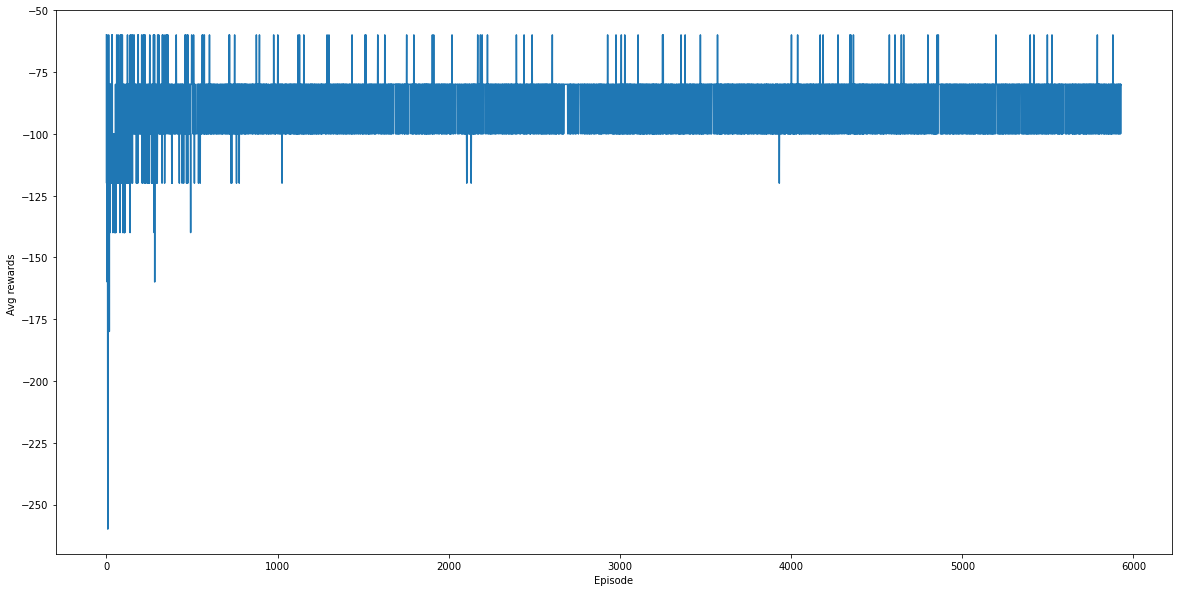

In [24]:
plt.figure(figsize=[20,10])
plt.plot(rewards_history)
plt.xlabel('Episode')
plt.ylabel('Avg rewards ')
plt.show()